In [1]:
using DifferentialEquations
using Plots

┌ Info: Recompiling stale cache file /Users/marieandree_ouellet/.julia/compiled/v1.2/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1240
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Info: Recompiling stale cache file /Users/marieandree_ouellet/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


In [3]:
function allee_strong(n0, p, t)
    n = n0
    dn_dt_n_strong = p.r*((((n/p.A)-1))*(1-(n/p.K)))
    return(dn_dt_n_strong)
end

function allee_weak(n0, p, t)
    n = n0
    dn_dt_n_weak = (p.r*(n^2)/p.K)*(1-(n/p.K))
    return(dn_dt_n_weak)
end

# Initial population sizes
n0 = 10.0

# to - t end
t=(0., 500.)

# Parameters
p = (r = 0.1, A = 5, K = 100)

#Definition du problème
prob_strong = ODEProblem(allee_strong, n0, t, p)
prob_weak = ODEProblem(allee_weak, n0, t, p)

# Résolution du problème
solution_strong = solve(prob_strong)
solution_weak = solve(prob_weak) 

retcode: Success
Interpolation: Automatic order switching interpolation
t: 22-element Array{Float64,1}:
   0.0                
   0.25654300857654516
   2.8219730943419963 
  16.881543795751522  
  39.24880406476008   
  62.10733235493095   
  86.87608489689093   
 109.8054187050618    
 129.06598471228148   
 146.66175929178243   
 162.3083439229357    
 178.50495092216252   
 197.70829336720695   
 220.22184111366317   
 248.7244700504396    
 284.7042154018875    
 327.2909343931132    
 370.6534824421117    
 410.57337053123916   
 446.4910322214865    
 479.67054612279367   
 500.0                
u: 22-element Array{Float64,1}:
 10.0              
 10.023139324038704
 10.260212731755972
 11.771833100638958
 15.250304426681057
 21.35462725165691 
 34.73511770016976 
 60.637467401448866
 86.58494712298474 
 97.0370628864757  
 99.33467281636257 
 99.86274761040042 
 99.9772758223572  
 99.99642950838789 
 99.99891280414002 
 99.99871501205368 
 99.99544882345724 
 99.9814473482328 

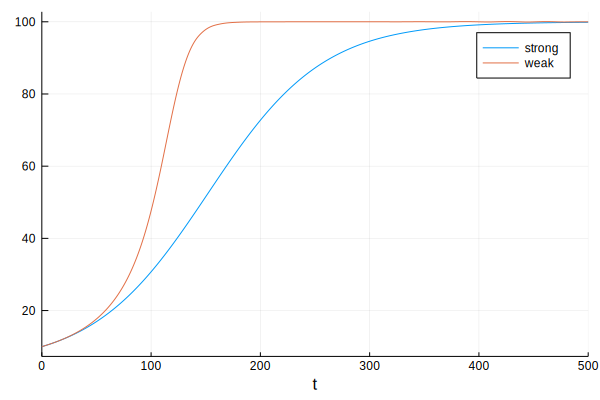

In [4]:
# Plot
plot()
plot(solution_strong, label = "strong")
plot!(solution_weak, label ="weak")

In [19]:
# évaluation équilibre

function eq_strong(p)
    return n_hat = p.A
end


eq_strong_exists(p) = all(eq_strong(p) .>1e-3)
#eq_weak_exists(p) = all(eq_weak(p) .>1e-3)


eq_strong_exists (generic function with 1 method)

In [22]:
# Grid for the search 
possible_values_r = 0.9:0.05:1.1
possible_values = 1:1:500
# Empty array for parameter values 
p_eq_strong = []

# Grid search
for A in possible_values
    for K in possible_values
        for r in possible_values_r
            p = (r=r, A=A, K=K)
            push!(p_eq_strong, p) 
        end
    end
end
# Keep only parameters for which the equilibrium exists 
filter!(eq_strong_exists, p_eq_strong)

1250000-element Array{Any,1}:
 (r = 0.9, A = 1, K = 1)     
 (r = 0.95, A = 1, K = 1)    
 (r = 1.0, A = 1, K = 1)     
 (r = 1.05, A = 1, K = 1)    
 (r = 1.1, A = 1, K = 1)     
 (r = 0.9, A = 1, K = 2)     
 (r = 0.95, A = 1, K = 2)    
 (r = 1.0, A = 1, K = 2)     
 (r = 1.05, A = 1, K = 2)    
 (r = 1.1, A = 1, K = 2)     
 (r = 0.9, A = 1, K = 3)     
 (r = 0.95, A = 1, K = 3)    
 (r = 1.0, A = 1, K = 3)     
 ⋮                           
 (r = 1.05, A = 500, K = 498)
 (r = 1.1, A = 500, K = 498) 
 (r = 0.9, A = 500, K = 499) 
 (r = 0.95, A = 500, K = 499)
 (r = 1.0, A = 500, K = 499) 
 (r = 1.05, A = 500, K = 499)
 (r = 1.1, A = 500, K = 499) 
 (r = 0.9, A = 500, K = 500) 
 (r = 0.95, A = 500, K = 500)
 (r = 1.0, A = 500, K = 500) 
 (r = 1.05, A = 500, K = 500)
 (r = 1.1, A = 500, K = 500) 

In [34]:
# Simulation of one trajectory
p_eq_1 = rand(eq_strong_exists)
prob_eq = ODEProblem(allee_strong, 1, t, p_eq_1)
sol_eq = solve(prob_eq)

ArgumentError: ArgumentError: Sampler for this object is not defined

In [28]:
display(eq_strong_exists)

eq_strong_exists (generic function with 1 method)